**Name:** Muluwork Geremew 

**Course:** Advanced Big Data and Data Mining  
**Project:** Advanced Data Mining for Data-Driven Insights and Predictive Modeling (Deliverbale 1)

# Deliverable 1: EDA and Data Visualization 
 ### Try to understand the data

In [3]:
import pandas as pd

# Load your uploaded CSV
df = pd.read_csv('Warehouse_and_Retail_Sales.csv')

# Display first 5 rows
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


## Dataset Description and Justification

### Dataset Overview
The **Warehouse and Retail Sales dataset** is provided by the Montgomery County Government and contains detailed records of alcohol sales transactions reported to the Montgomery County Department of Liquor Control. The dataset includes fields such as fiscal year, month, supplier, item codes and descriptions, item types, and monetary values for retail sales, retail transfers, and warehouse sales.

### Why this dataset?
This dataset is well-suited for this data mining project for the following reasons:
- **Sufficient size:**  
  The dataset contains over **307,000 records**, far exceeding the minimum requirement of 500 records, providing a rich basis for analysis.
  
- **Multiple attributes:**  
  It offers **9 diverse attributes**, including temporal (`YEAR`, `MONTH`), categorical (`SUPPLIER`, `ITEM CODE`, `ITEM DESCRIPTION`, `ITEM TYPE`), and numerical (`RETAIL SALES`, `RETAIL TRANSFERS`, `WAREHOUSE SALES`) features, allowing for exploration across different data types.
  
- **Real-world relevance:**  
  The dataset reflects actual government-tracked retail and warehouse alcohol sales, offering an authentic use case for retail business analytics, demand forecasting, and inventory management insights.

- **Data mining potential:**  
  The data structure is ideal for applying a variety of techniques such as:
  - **Regression modeling:** Predicting sales volumes.
  - **Classification:** Categorizing items or suppliers.
  - **Clustering:** Identifying similar products or sales patterns.
  - **Association rule mining:** Discovering purchasing patterns among item types.

### Conclusion
The **Warehouse and Retail Sales dataset** provides a comprehensive, real-world dataset that enables the application of data mining techniques to derive actionable insights in retail and supply chain domains. Its size, attribute diversity, and relevance make it an excellent choice for this project.


In [5]:
# 1️⃣ Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# 2️⃣ Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# 3️⃣ Basic consistency check for numeric columns:
print("\nDescriptive stats for numeric columns:")
print(df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].describe())

# Check for negative sales values (potential noisy data)
neg_retail_sales = (df['RETAIL SALES'] < 0).sum()
neg_retail_transfers = (df['RETAIL TRANSFERS'] < 0).sum()
neg_warehouse_sales = (df['WAREHOUSE SALES'] < 0).sum()

print(f"\nNegative RETAIL SALES: {neg_retail_sales}")
print(f"Negative RETAIL TRANSFERS: {neg_retail_transfers}")
print(f"Negative WAREHOUSE SALES: {neg_warehouse_sales}")

Missing values per column:
YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

Number of duplicate rows: 0

Descriptive stats for numeric columns:
        RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES
count  307642.000000     307645.000000    307645.000000
mean        7.024071          6.936465        25.294597
std        30.986238         30.237195       249.916798
min        -6.490000        -38.490000     -7800.000000
25%         0.000000          0.000000         0.000000
50%         0.320000          0.000000         1.000000
75%         3.267500          3.000000         5.000000
max      2739.000000       1990.830000     18317.000000

Negative RETAIL SALES: 113
Negative RETAIL TRANSFERS: 1016
Negative WAREHOUSE SALES: 716


## Data Cleaning Action Plan

### 1️⃣ Missing Values Handling
- **SUPPLIER**: 167 missing values  
  👉 Action: Fill missing values with `'Unknown'` to retain records while acknowledging incomplete supplier information.

- **ITEM TYPE**: 1 missing value  
  👉 Action: Fill missing value with `'Unknown'`.

- **RETAIL SALES**: 3 missing values  
  👉 Action: Drop rows with missing `RETAIL SALES` since it is a key numerical attribute and the number of missing rows is negligible.

---

### 2️⃣ Duplicate Rows
- Inspection showed `0` duplicate rows.  
  👉 Action: No action needed.

---

### 3️⃣ Negative Values (Potential Noisy Data)
- Negative values found in sales-related columns:
  - `RETAIL SALES`: 113 negative values
  - `RETAIL TRANSFERS`: 1,016 negative values
  - `WAREHOUSE SALES`: 716 negative values

  These likely represent refunds, adjustments, or erroneous data.  
  👉 Action: Remove rows where any of these columns contain negative values to ensure only positive sales transactions are analyzed.

---

### 4️⃣ Summary of Cleaning Steps
- Impute categorical missing values (`SUPPLIER` and `ITEM TYPE`) with `'Unknown'`.
- Drop 3 rows with missing `RETAIL SALES`.
- Remove rows with negative values in `RETAIL SALES`, `RETAIL TRANSFERS`, or `WAREHOUSE SALES`.
- No duplicates to remove.

---

✅ After these cleaning steps, the dataset will be ready for **exploratory data analysis (EDA)**.


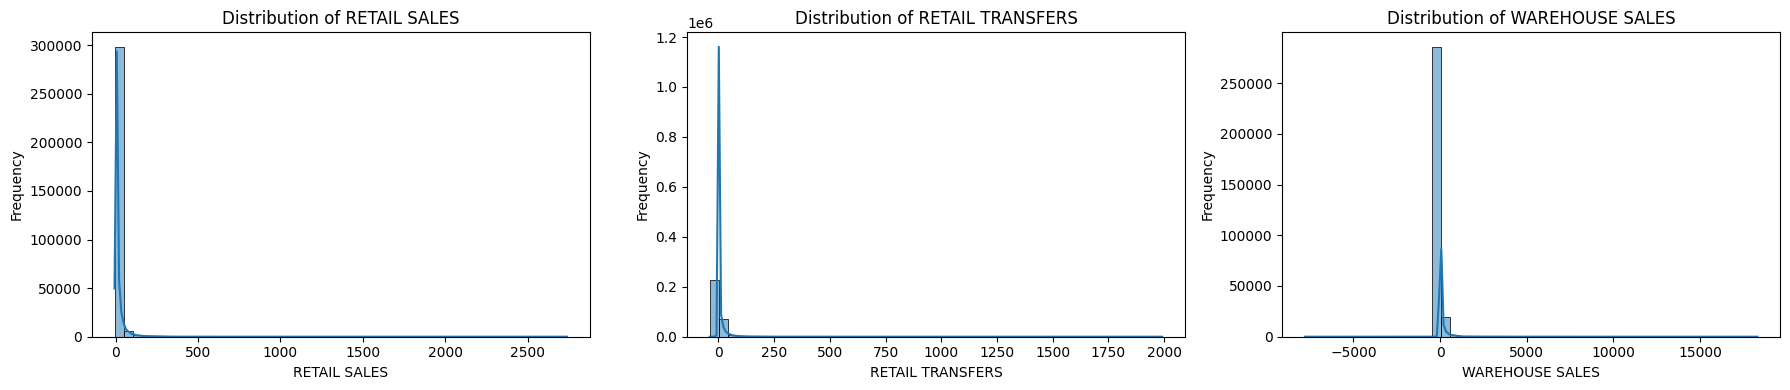

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns to plot
numeric_cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Loop through columns and plot
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Distribution Analysis of Sales Variables

The figure below presents histograms showing the distribution of the three key numerical variables: `RETAIL SALES`, `RETAIL TRANSFERS`, and `WAREHOUSE SALES`.

#### Key observations:
- **All three variables are highly right-skewed**:  
  Most transactions involve very low sales amounts (close to zero), with a small number of transactions representing very large sales. This is typical in retail datasets where low-volume purchases dominate while large transactions are rare but significant.

- **`RETAIL SALES` distribution:**  
  Majority of values cluster below 100, with occasional extreme outliers up to around 2,700.

- **`RETAIL TRANSFERS` distribution:**  
  Strong concentration around small values and zero, with few larger transfers up to around 2,000.

- **`WAREHOUSE SALES` distribution:**  
  Skewed similarly, with most transactions small but some reaching large amounts over 18,000.

#### Implications for modeling:
- The strong skewness suggests that future regression or clustering models might benefit from a **log transformation** to normalize these distributions.
- Extreme outliers should be carefully considered as they may heavily influence models sensitive to large values (e.g., linear regression).



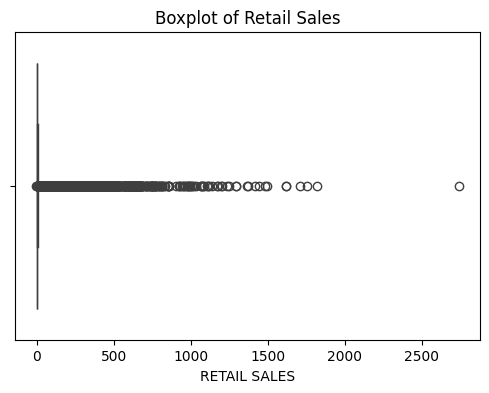

In [8]:
# Boxplot for RETAIL SALES
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['RETAIL SALES'])
plt.title('Boxplot of Retail Sales')
plt.show()


### Boxplot Analysis of `RETAIL SALES`

The boxplot for `RETAIL SALES` highlights the distribution and presence of outliers in the data.

#### Key observations:
- The boxplot shows that most `RETAIL SALES` values are concentrated near the lower end of the scale (close to zero), consistent with the histogram findings.
- There is a long right tail with many extreme outliers, indicating some transactions involve very large sales amounts.
- The median `RETAIL SALES` value lies very close to the bottom of the overall range, further confirming the right-skewness of the distribution.

#### Implications for modeling:
- The presence of significant outliers suggests that:
  - **Robust scaling or transformations (e.g., log transformation)** may be needed before applying regression models.
  - **Outlier treatment** should be considered if these extreme values disproportionately influence model performance.


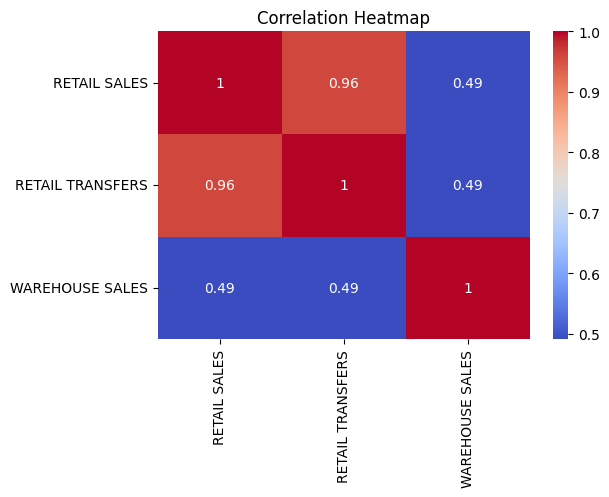

In [9]:
# Correlation matrix for numeric features
plt.figure(figsize=(6, 4))
corr = df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Correlation Heatmap Analysis

The correlation heatmap shows the pairwise Pearson correlation coefficients between the key numerical variables: `RETAIL SALES`, `RETAIL TRANSFERS`, and `WAREHOUSE SALES`.

#### Key observations:
- **Strong positive correlation between `RETAIL SALES` and `RETAIL TRANSFERS` (0.96):**  
  This suggests that when retail sales increase, retail transfers tend to increase as well, possibly indicating common drivers such as demand or promotional activities.

- **Moderate positive correlations between `WAREHOUSE SALES` and both `RETAIL SALES` (0.49) and `RETAIL TRANSFERS` (0.49):**  
  This implies a moderate relationship between warehouse distribution activity and retail transactions.

#### Implications for modeling:
- The high correlation (0.96) between `RETAIL SALES` and `RETAIL TRANSFERS` suggests potential multicollinearity, which could impact regression models if both variables are included as predictors.
- Feature selection or dimensionality reduction (e.g., PCA) may help address this if necessary in future modeling steps.



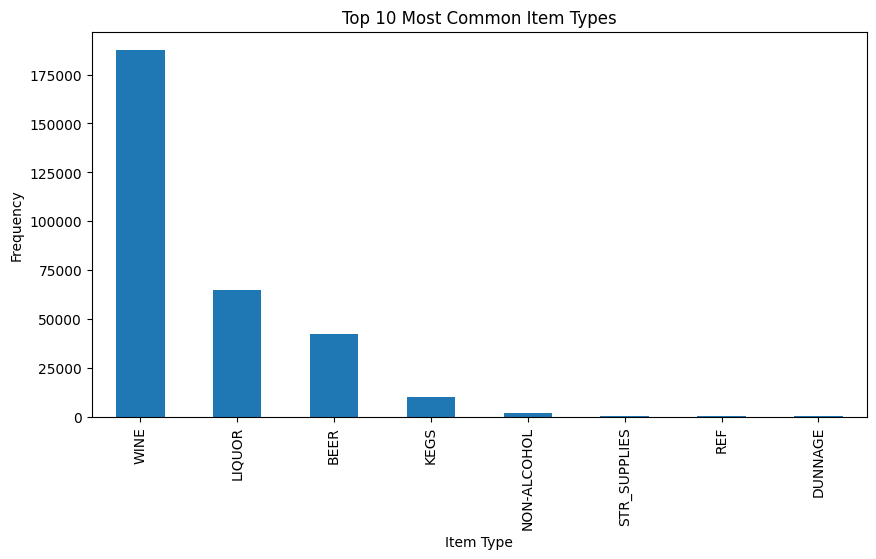

In [10]:
plt.figure(figsize=(10, 5))
df['ITEM TYPE'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Item Types')
plt.xlabel('Item Type')
plt.ylabel('Frequency')
plt.show()


### Item Type Frequency Analysis

The bar plot shows the top 10 most frequently occurring `ITEM TYPE`s in the dataset.

#### Key observations:
- **Wine dominates sales records**, appearing most frequently by a large margin.
- Other popular item types include `LIQUOR` and `BEER`, which together with `WINE` account for the majority of transactions.
- Less frequent item types such as `KEGS`, `NON-ALCOHOL`, `STR_SUPPLIES`, `REF`, and `DUNNAGE` occur far less often, suggesting a long tail of less common products.

#### Implications for modeling:
- The concentration of transactions around a few dominant item types may influence classification or clustering models, where balancing the representation of categories could improve performance.
- Item types like `WINE`, `LIQUOR`, and `BEER` may serve as useful predictors or segmentation features for further analysis.


## Data Cleaning Plan

Based on initial inspection and exploratory data analysis, the following cleaning actions will be implemented to prepare the dataset for future modeling:

### 1️⃣ Handle Missing Values
- `SUPPLIER`: 167 missing values  
  🔧 **Plan**: Impute missing entries with `'Unknown'` to preserve these records while clearly marking incomplete supplier information.

- `ITEM TYPE`: 1 missing value  
  🔧 **Plan**: Impute missing value with `'Unknown'`.

- `RETAIL SALES`: 3 missing values  
  🔧 **Plan**: Drop these rows, as this field is crucial and the number of missing records is negligible.

---

### 2️⃣ Remove Duplicates
- No duplicate rows detected.  
  🔧 **Plan**: No action required.

---

### 3️⃣ Address Negative Numeric Values (Potential Noisy Data)
- Detected negative values in `RETAIL SALES`, `RETAIL TRANSFERS`, and `WAREHOUSE SALES`:
  - 113, 1,016, and 716 records respectively.

  Negative amounts might represent refunds or adjustments but no metadata is provided to confirm.  

  🔧 **Plan**: Remove rows containing any negative value in these columns to ensure consistency and focus analysis on positive sales transactions.

---

### 4️⃣ Review for Outliers
- **Boxplots and histograms show extreme right-skewness and many high-value outliers,** but these likely represent valid large transactions.

  🔧 **Plan**: 
  - Retain these outliers for now but consider log transformation or robust scaling during modeling to mitigate skewness impact.

---

### Summary:
- Impute `'Unknown'` for missing categorical fields (`SUPPLIER`, `ITEM TYPE`).
- Drop rows with missing `RETAIL SALES` values.
- Remove rows with any negative sales values.
- Keep high-value outliers but monitor their impact during modeling.

These steps ensure a cleaned dataset ready for regression, classification, clustering, and association rule mining tasks.


#### why We will retain high-value outliers for now 

We chose to retain high-value outliers at this cleaning stage because:
- They likely represent valid large transactions (e.g., bulk orders) and are part of real-world retail behavior.
- Removing them risks losing important business insights.
- We will address their influence later during modeling through techniques such as log transformation or robust estimators.


In [12]:
# 1️⃣ Handle missing values
# Impute 'Unknown' for SUPPLIER and ITEM TYPE
df['SUPPLIER'] = df['SUPPLIER'].fillna('Unknown')
df['ITEM TYPE'] = df['ITEM TYPE'].fillna('Unknown')

# Drop rows where RETAIL SALES is missing (only 3 rows)
df = df[df['RETAIL SALES'].notnull()]

# 2️⃣ Remove duplicates (even though we know there are none, good practice to include)
df = df.drop_duplicates()

# 3️⃣ Remove rows with negative sales values
df = df[(df['RETAIL SALES'] >= 0) &
        (df['RETAIL TRANSFERS'] >= 0) &
        (df['WAREHOUSE SALES'] >= 0)]

# 4️⃣ Outlier handling strategy
# We will retain high-value outliers for now (no action taken here)

# Optional: Check final dataset shape after cleaning
print(f"Final dataset shape after cleaning: {df.shape}")


Final dataset shape after cleaning: (305803, 9)


### 🔎 Post-cleaning exploration goals:
Now that we have a cleaned dataset (305,803 rows), we can:

 - Re-check summary statistics

 - Look at distributions again to confirm the cleaning effect

 - Ensure no negative or missing values remain

 - Optionally profile categorical columns (SUPPLIER, ITEM TYPE)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 305803 entries, 0 to 307643
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              305803 non-null  int64  
 1   MONTH             305803 non-null  int64  
 2   SUPPLIER          305803 non-null  object 
 3   ITEM CODE         305803 non-null  object 
 4   ITEM DESCRIPTION  305803 non-null  object 
 5   ITEM TYPE         305803 non-null  object 
 6   RETAIL SALES      305803 non-null  float64
 7   RETAIL TRANSFERS  305803 non-null  float64
 8   WAREHOUSE SALES   305803 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 23.3+ MB
None

Missing values after cleaning:
YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

Summary statistics for numeric columns:

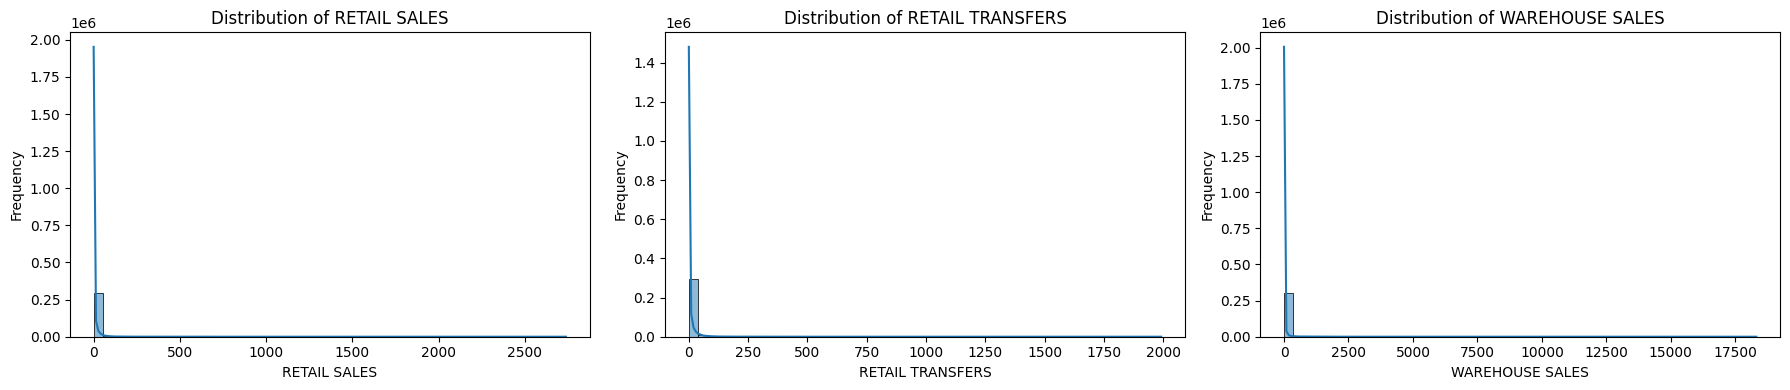

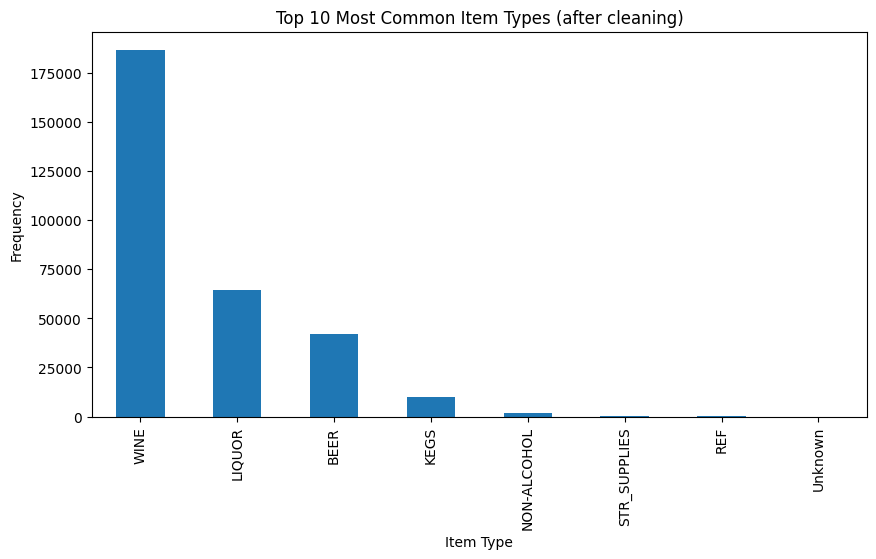

In [13]:
# 1️⃣ Check general info and ensure no nulls remain
print("DataFrame Info:")
print(df.info())

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# 2️⃣ Summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
print(df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].describe())

# 3️⃣ Check for negative values (should all be zero now)
neg_retail = (df['RETAIL SALES'] < 0).sum()
neg_transfers = (df['RETAIL TRANSFERS'] < 0).sum()
neg_warehouse = (df['WAREHOUSE SALES'] < 0).sum()
print(f"\nNegative RETAIL SALES: {neg_retail}")
print(f"Negative RETAIL TRANSFERS: {neg_transfers}")
print(f"Negative WAREHOUSE SALES: {neg_warehouse}")

# 4️⃣ Distribution plots (updated after cleaning)
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
numeric_cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 5️⃣ Frequency count of 'ITEM TYPE'
plt.figure(figsize=(10, 5))
df['ITEM TYPE'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Item Types (after cleaning)')
plt.xlabel('Item Type')
plt.ylabel('Frequency')
plt.show()

## Post-cleaning Exploration Summary

After completing data cleaning, we explored the cleaned dataset (`305,803 records` and `9 attributes`) to confirm data quality and understand key characteristics.

### ✅ Data Quality Checks:
- **No missing values** remain in any column.
- **No negative values** present in `RETAIL SALES`, `RETAIL TRANSFERS`, or `WAREHOUSE SALES` after cleaning.
- **No duplicate records**.

---

### 📊 Updated Distribution Insights:
- The distributions for all three key numeric variables (`RETAIL SALES`, `RETAIL TRANSFERS`, `WAREHOUSE SALES`) remain **highly right-skewed**, dominated by smaller transactions with a few very large values (valid real-world outliers retained as planned).
- These distributions confirm that most transactions involve low sales amounts but occasional high-value purchases or transfers exist.

---

### 🔎 Categorical Feature Analysis:
- The most common `ITEM TYPE`s remained consistent after cleaning:
  - `WINE` remains the dominant category by a large margin.
  - Other popular categories include `LIQUOR`, `BEER`, and `KEGS`.
  - A small number of records with missing `ITEM TYPE` were successfully imputed as `Unknown`.

---

### Implications:
- The dataset is now fully prepared for further analysis and modeling.
- Right-skewness in numeric features suggests that **transformations (e.g., log transformation) may help normalize distributions in later stages**.
- The dominance of a few item types highlights potential areas for targeted analysis (e.g., forecasting wine sales, clustering stores by product mix).

